In [1]:
%matplotlib notebook
import pandas as pd
from datetime import date, datetime as dt
import matplotlib.pyplot as plt

In [2]:
#import data and rename columns
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTcdP3ne8G2iQ4YBAN-QBPyJkEY7bzHbwprXVEdJhZGDRXLA0nxKiG54CZMcXSR5StFtrKst5x5pKXd/pub?output=csv'

data = pd.read_csv(path)
    
data = data.rename(columns = {'Enter date for time entered': 'Date', 
                                  'Class Time':'Class', 'Lab Time':'Lab',
                                  'Anki (as recorded in app)':'Anki',
                                  'Other (Group Study, Committees, Shadowing, etc.)':'Other',
                                  'Self Study (not including Anki)':'Self-Study'})
    
df = pd.DataFrame(data)
df.tail()

,Timestamp,Date,Class,Lab,Anki,Volunteering,Research,Other,Self-Study
39,6/27/2020 8:32:01,6/26/2020,NaN,NaN,16.0,NaN,NaN,NaN,80.0
40,6/28/2020 17:24:05,6/27/2020,NaN,NaN,21.0,NaN,NaN,NaN,NaN
41,6/28/2020 21:16:16,6/28/2020,NaN,NaN,33.0,NaN,120.0,56.0,NaN
42,6/29/2020 20:41:38,6/29/2020,NaN,NaN,22.0,NaN,72.0,NaN,90.0
43,7/1/2020 8:23:11,6/30/2020,NaN,NaN,18.0,NaN,25.0,NaN,301.0


In [3]:
#convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

#returns day of week as an integer where Monday is 0 and Sunday is 6
df['Dow'] = df['Date'].dt.weekday

#returns month as an integer where Jan is 1 and Dec is 12
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
#df.tail()

In [4]:
# add in sum row
col_list = list(df)
col_list.remove('Dow')
col_list.remove('Month')
col_list.remove('Year')
col_list

['Timestamp',
 'Date',
 'Class',
 'Lab',
 'Anki',
 'Volunteering',
 'Research',
 'Other',
 'Self-Study']

In [5]:
df['Sum'] = df[col_list].sum(axis=1)
#df.tail()

In [6]:
#sort by dow for figure
df_dow = df.groupby(['Dow'])['Sum'].mean().reset_index(name = 'Total').set_index(['Dow'])
#df_dow.tail()

In [7]:
df_dow.plot.bar(legend = False)
plt.title('Average total minutes by Day of Week')
plt.xlabel('Day of Week where 0 = Monday')
plt.ylabel('Minutes')
plt.savefig('total_dow.png')

<IPython.core.display.Javascript object>

In [8]:
#sum the months for total by month figure
df_month = df.groupby(['Month'])['Sum'].sum().reset_index(name = 'Total').set_index(['Month'])
#convert minutes to hours
df_month['Total'] = df_month['Total']/60
df_month#average the months so that this script works year over year
df_month = df_month.groupby(['Month'])['Total'].mean().reset_index(name = 'Total').set_index(['Month'])
#df_month.tail()

In [9]:
df_month.plot.bar(legend = False)
plt.title('Average total hours by Month')
plt.xlabel('Month where 1 = January')
plt.ylabel('Hours')
plt.savefig('total_month.png')

<IPython.core.display.Javascript object>

In [10]:
#sum the years for total by years figure
df_year = df.groupby(['Year'])['Sum'].sum().reset_index(name = 'Total').set_index(['Year'])
#convert minutes to hours
df_year['Total'] = df_year['Total']/60
#average the years so that this script works year over year
df_year = df_year.groupby(['Year'])['Total'].mean().reset_index(name = 'Total').set_index(['Year'])
#df_year.tail()

In [11]:
df_year.plot.bar(legend = False)
plt.title('Average total hours per Year')
plt.xlabel('Year')
plt.ylabel('Hours')
plt.savefig('total_year.png')

<IPython.core.display.Javascript object>

In [34]:
#create new dataframe with activiies indexed by dow for figure
cat_dow = df.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other'],index = ['Dow'])

<IPython.core.display.Javascript object>


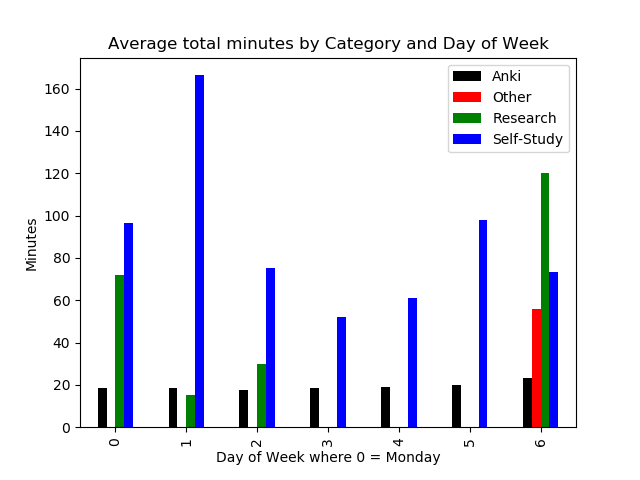

In [35]:
cat_dow.plot.bar(color=['black', 'red', 'green', 'blue', 'grey', 'purple', 'orange'])
plt.title('Average total minutes by Category and Day of Week')
plt.xlabel('Day of Week where 0 = Monday')
plt.ylabel('Minutes')
plt.legend(loc = 'best')
plt.savefig('cat_dow.png')

In [14]:
#create new dataframe with activiies indexed by month for figure
cat_month = df.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other','Sum'],
                           index = ['Month'], aggfunc='sum')
cat_month = cat_month.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other'],
                           index = ['Month'])
#convert minutes to hours
cat_month['Anki'] = cat_month['Anki']/60
cat_month['Class'] = cat_month['Class']/60
cat_month['Lab'] = cat_month['Lab']/60
cat_month['Research'] = cat_month['Research']/60
cat_month['Self-Study'] = cat_month['Self-Study']/60
cat_month['Volunteering'] = cat_month['Volunteering']/60
cat_month['Other'] = cat_month['Other']/60
cat_month

,Anki,Class,Lab,Other,Research,Self-Study,Volunteering
Month,,,,,,,
5,4.933333,0.0,0.0,0.000000,0.5,9.833333,0.0
6,8.433333,0.0,0.0,0.933333,3.7,47.016667,0.0


<IPython.core.display.Javascript object>


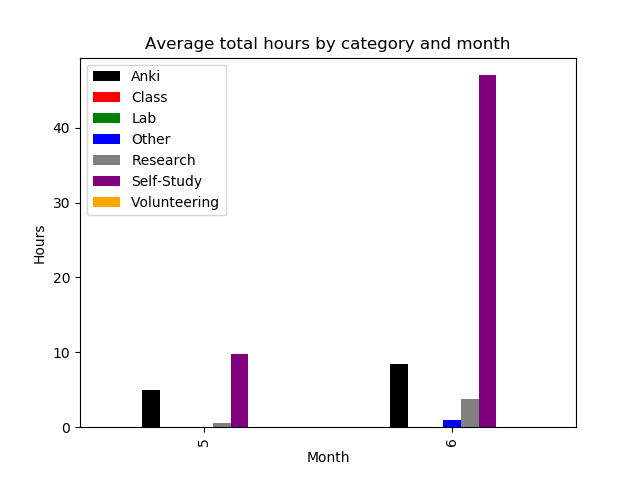

In [29]:
cat_month.plot.bar(color=['black', 'red', 'green', 'blue', 'grey', 'purple', 'orange'])
plt.title('Average total hours by category and month')
plt.xlabel('Month')
plt.ylabel('Hours')
plt.legend(loc = 'best')
plt.savefig('cat_month.png')

In [16]:
#create new dataframe with activiies indexed by year for figure
cat_year = df.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other','Sum'],
                           index = ['Year'], aggfunc='sum')
cat_year = cat_year.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other'],
                           index = ['Year'])
#convert minutes to hours
cat_year['Anki'] = cat_year['Anki']/60
cat_year['Class'] = cat_year['Class']/60
cat_year['Lab'] = cat_year['Lab']/60
cat_year['Research'] = cat_year['Research']/60
cat_year['Self-Study'] = cat_year['Self-Study']/60
cat_year['Volunteering'] = cat_year['Volunteering']/60
cat_year['Other'] = cat_year['Other']/60

<IPython.core.display.Javascript object>


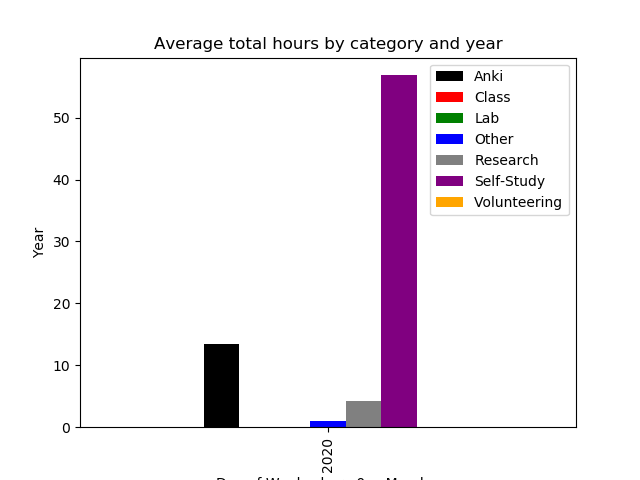

In [28]:
cat_year.plot.bar(color=['black', 'red', 'green', 'blue', 'grey', 'purple', 'orange'])
plt.title('Average total hours by category and year')
plt.xlabel('Day of Week where 0 = Monday')
plt.ylabel('Year')
plt.legend(loc = 'best')
plt.savefig('cat_year.png')

In [18]:
df_date = df
df_date['Date'] = df_date['Date'].dt.date
df_date = df.groupby(['Date'])['Sum'].sum().reset_index(name = 'Total').set_index(['Date'])
df_date.tail()

,Total
Date,
2020-06-26,96.0
2020-06-27,21.0
2020-06-28,209.0
2020-06-29,184.0
2020-06-30,344.0


In [19]:
df_date.plot.bar(legend = False, figsize = (10,10))
plt.title('Total Minutes by Date')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.savefig('total_date.png')

<IPython.core.display.Javascript object>

In [23]:
cat_date = df
cat_date = cat_date.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other'],
                           index = ['Date'], aggfunc='sum')


<IPython.core.display.Javascript object>


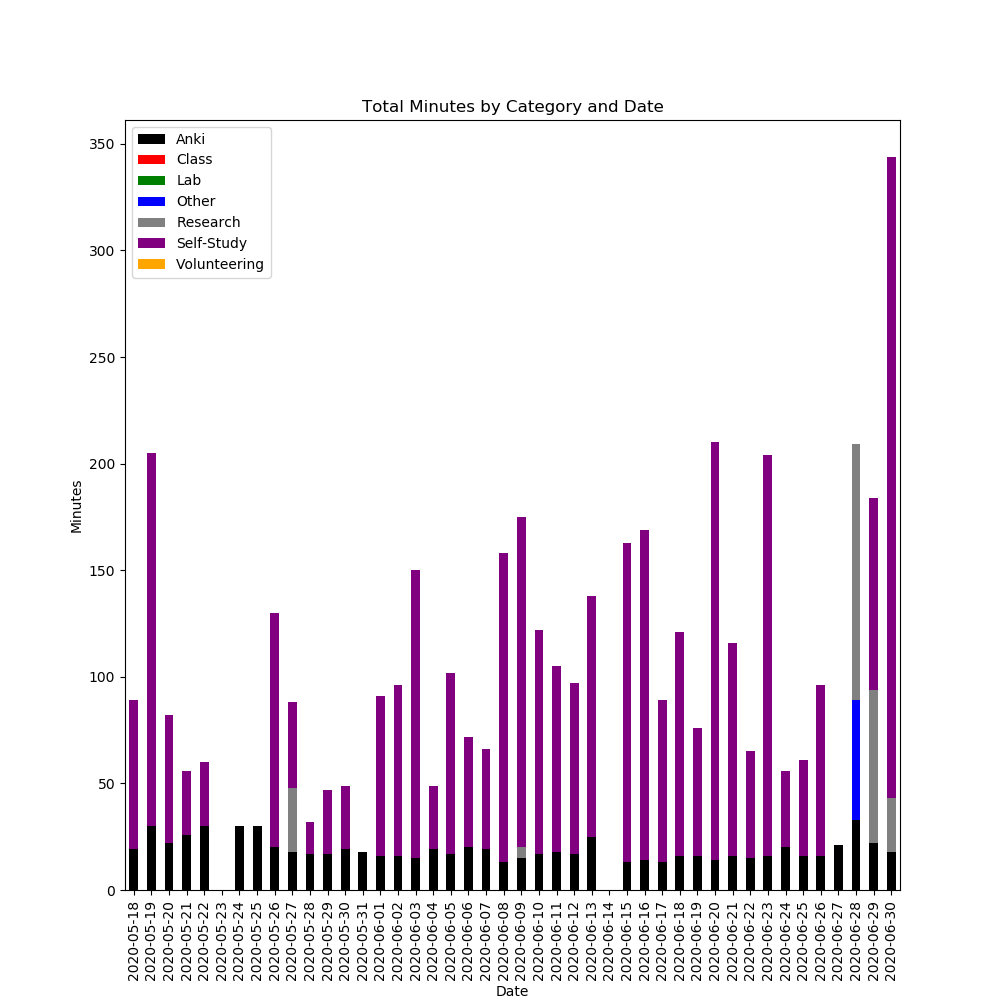

In [27]:
cat_date.plot.bar(stacked = True, figsize = (10,10), color=['black', 'red', 'green', 'blue', 'grey', 'purple', 'orange'])
plt.title('Total Minutes by Category and Date')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.savefig('cat_date.png')